In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
sns.set()

In [5]:
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)','Spending Score (1-100)']].values
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


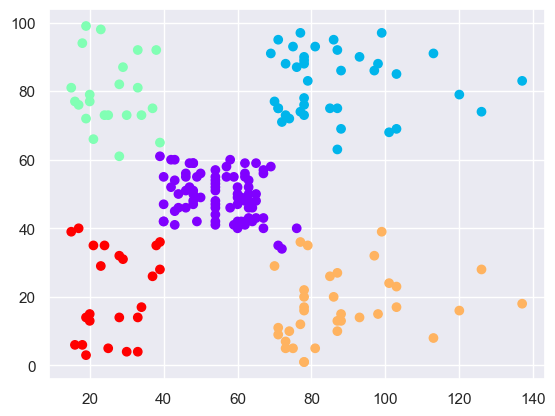

In [17]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='rainbow')

In [23]:
range_n_clusters = list(range(2,11))
silhouette_scores = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette)
    print(f"For n_clusters = {i}, the average silhouette_score is: {silhouette:.2f}")

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

For n_clusters = 2, the average silhouette_score is: 0.32
For n_clusters = 3, the average silhouette_score is: 0.47
For n_clusters = 4, the average silhouette_score is: 0.49
For n_clusters = 5, the average silhouette_score is: 0.55
For n_clusters = 6, the average silhouette_score is: 0.54
For n_clusters = 7, the average silhouette_score is: 0.53
For n_clusters = 8, the average silhouette_score is: 0.46
For n_clusters = 9, the average silhouette_score is: 0.46
For n_clusters = 10, the average silhouette_score is: 0.44


/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


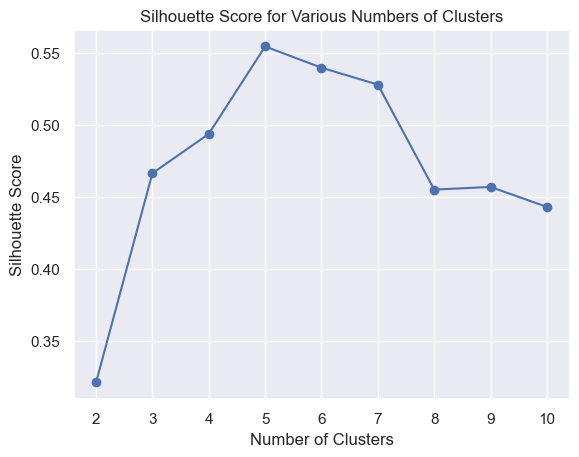

In [24]:
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


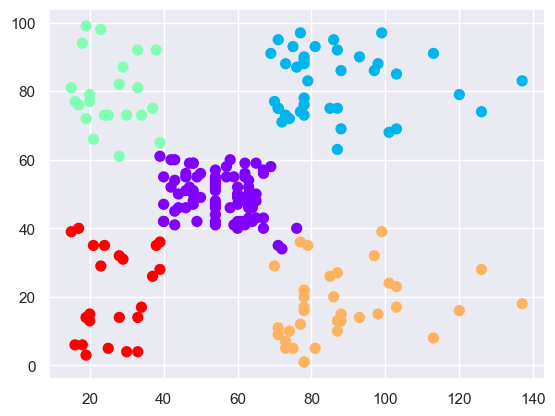

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans =kmeans.fit_predict(X_scaled)
centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(X_scaled) 
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', label='Data Points')

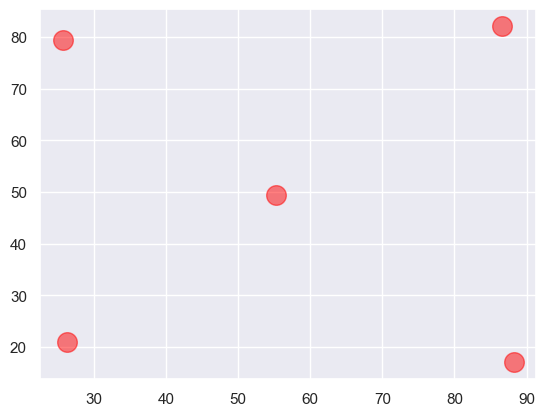

In [33]:
#cluster centers on the original scale
plt.scatter(centers_original_scale[:, 0], centers_original_scale[:, 1], c='red', s=200, alpha=0.5, marker='o', label='Cluster Centers')